 # Correlation
 Relate to the way people use the term **correlation**, often they mention events or things that are expected to happen together. We may use the term loosely
 and may interprate that one is causing the other. But when we study correlation, we are always told **correlation is not causation** and so our initial inkling mustn't be that conclusion.
 for e.g. one may say, "It rains whenever I wear white", we know that this cant be true but statements such as these sometimes may be interpreted as one causing the other.
 <br> <br>
 The most comman form of correlation coefficient that most data scientists compute is called
 **pearson correlation coefficient**. Normally, when we say correlation it is assumed that its pearson correlation that's been computed, but it doesn't take a lot to confirm.
 We will discuss 3 types correlation coefficients but you may find a few more in the literature.
 1. Pearson correlation coefficient
 2. Spearman correlation coefficient
 3. Point Biseral correlation coefficient
 ## Pearson correlation coefficient
 As mentioned this is the most common form of correlation coefficient, and its computed as follows.
 $$
 \rho_{X, Y} = \frac{\mathbb{E}[(X - \mu_{X})(Y - \mu_{Y})]}{\sigma_{X} \sigma_{Y}}
 $$
 The numerator represents covariance between X and Y and the denominator represents the standard deviation.
 The use of standard deviation suggests that pearson coefficient assumes that the distribution is a form of normal/gaussian distribution.
 <br><br>
 Here are few important elements to remember about the coefficient.
 * It measures a linear relationship/trend between two numerical variables and is effected by outliers.
 * Correlation ranges from -1 to 1, wherein value of -1 represents perfect negative. While a value of 1 reflects perfect positive correlation.
 * A positive correlation value suggests that both quantities increase together.
 * A negative correlation value suggests that as one value increases the other decreases.
 * A value of zero(0) correlation suggests that there is no linear relationship between the quantities.
 * Correlation value is unit less as you would observe from the equation above (the units cancel out),
 which means it isn't associate with any measurement and so can be used for comparisons.
 for e.g correlation value of 0.9 is the same even if the value is measured in kilometers or miles.

 Let's demonstrate this with some code. We will import some libraries.

In [1]:
# importing some libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr

In [2]:
# Create different scenarios of correlation

perfect_pos_corr = [(x, x + 2) for x in range(1, 11)]
pos_corr_outlier = perfect_pos_corr.copy()
pos_corr_outlier.extend([(11, 6), (12, 2)])

perfect_neg_corr = [
    (x, y) for x, y in zip(range(1, 11), sorted(range(1, 11), reverse=True))
]
np.random.seed(0)
no_corr = [(np.random.randn(500), np.random.randn(500))]

x1, y1 = zip(*perfect_pos_corr)
x2, y2 = zip(*perfect_neg_corr)
x3, y3 = zip(*no_corr)
x4, y4 = zip(*pos_corr_outlier)

 The first graph shows a **perfect positive** linear trend with a value of 1, while the second graph shows a **perfect negative** trend, with a value of -1.
 We also have the third graph which almost certainly shows a random set of points with no linear trend and thus it has
 a correlation value of nearly(-0.04) zero. The last plot is rather interesting because, it almost has a perfect positive linear trend
 but has two points which are outlier points. Thus, by adding a few outliers we have affected the pearson correlation cofficient
 by a large degree i.e. dropping the strength of relationship from a value of 1 to 0.36, which suggests weak linear relationship.

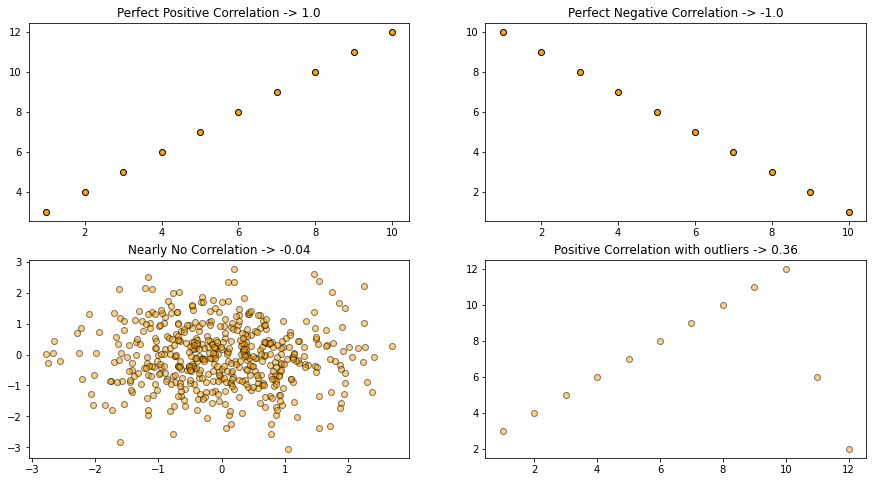

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax1.scatter(x1, y1, color="orange", edgecolor="k")
ax1.set_title(f"Perfect Positive Correlation -> {round(pearsonr(x1,y1)[0],2)}")
ax2.scatter(x2, y2, color="orange", edgecolor="k")
ax2.set_title(f"Perfect Negative Correlation -> {round(pearsonr(x2,y2)[0],2)}")
ax3.scatter(x3, y3, alpha=0.5, color="orange", edgecolor="k")
ax3.set_title(f"Nearly No Correlation -> {round(pearsonr(x3[0],y3[0])[0],2)}")
ax4.scatter(x4, y4, alpha=0.5, color="orange", edgecolor="k")
ax4.set_title(
    f"Positive Correlation with outliers -> {round(pearsonr(x4,y4)[0],2)}"
)
plt.show()

 ## Spearman Correlation Coefficient
 Spearman correlation coefficient has some advantages over pearson correlation coefficient.
 It performs well in cases where pearson correlation coefficient doesnt pick the strength of relationship
 between the features. It is defined as follows,
 $$
 r_{s} = \frac{cov((R(X),R(Y))}{\sigma_{R(X)} \sigma_{R(Y)}}
 $$
 The numerator represents covariance between the rank of the values in X and in Y and the denominator represents the standard deviation of the rank.
 So if you had a table with examples such as below, ranks are calculated in the following manner.

 | X  | Y  | R(X) | R(Y) |
 |----|----|------|------|
 | 20 | 5  | 20   | 3    |
 | 10 | 2  | 1    | 1    |
 | 50 | 80 | 3    | 2    |


 <br><br>
 Here are few important elements to remember about the coefficient.
 * It measures linear or non-linear trend between two numerical variables and the are not as sensitive to outliers as pearson correlation coefficient is.
 * It ranges from -1 to 1, wherein value of -1 represents perfect negative. While a value of 1 reflects perfect positive correlation.
 * A positive correlation value suggests that both quantities increase together.
 * A negative correlation value suggests that as one value increases the other decreases.
 * A value of zero(0) correlation suggests that there is no linear relationship between the quantities.
 * Same as pearson, the value is unit less and can be used for comparisons.

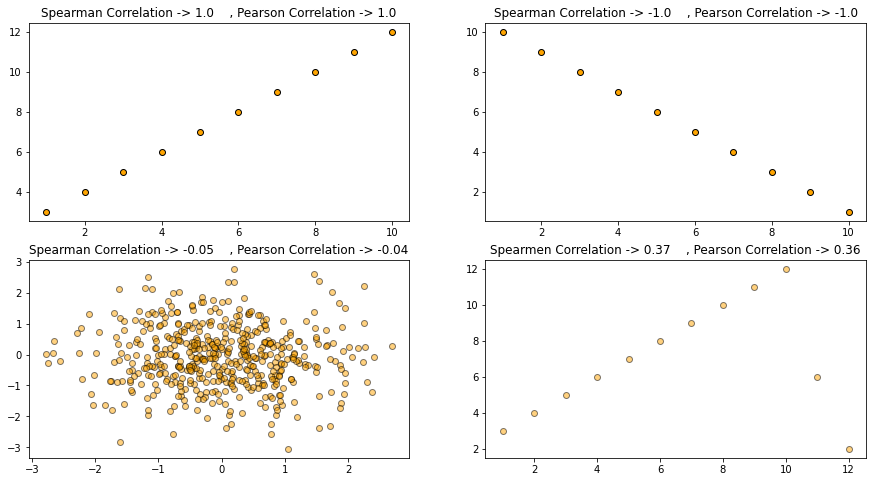

In [4]:
from scipy.stats.stats import spearmanr

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax1.scatter(x1, y1, color="orange", edgecolor="k")
ax1.set_title(
    f"Spearman Correlation -> {round(spearmanr(x1,y1)[0],2)}\
    , Pearson Correlation -> {round(pearsonr(x1,y1)[0],2)}"
)
ax2.scatter(x2, y2, color="orange", edgecolor="k")
ax2.set_title(
    f"Spearman Correlation -> {round(spearmanr(x2,y2)[0],2)}\
    , Pearson Correlation -> {round(pearsonr(x2,y2)[0],2)}"
)

ax3.scatter(x3, y3, alpha=0.5, color="orange", edgecolor="k")

ax3.set_title(
    f"Spearman Correlation -> {round(spearmanr(x3[0],y3[0])[0],2)}\
    , Pearson Correlation -> {round(pearsonr(x3[0],y3[0])[0],2)}"
)
ax4.scatter(x4, y4, alpha=0.5, color="orange", edgecolor="k")
ax4.set_title(
    f"Spearmen Correlation -> {round(spearmanr(x4,y4)[0],2)}\
    , Pearson Correlation -> {round(pearsonr(x4,y4)[0],2)}"
)
plt.show()

In [5]:
from scipy.special import expit

np.random.seed(1)
scatter_dataX1 = np.random.randn(100)
scatter_dataY1 = scatter_dataX1 + np.random.randn(100) * 0.5
scatter_dataY1[-10:] = 3 + np.random.rand(1)

scatter_dataX2 = np.sort(np.random.randn(100))
scatter_dataY2 = scatter_dataX2 + np.random.randn(100) * 0.5
scatter_dataY2[-10:] = 3 + np.random.rand(1)

scatter_dataX3 = np.sort(np.random.randn(100))
scatter_dataY3 = scatter_dataX3 + np.random.randn(100) * 0.1
scatter_dataX3[-10:] = -1 + np.random.rand(1)


scatter_dataX4 = np.linspace(-10, 10, 100)
scatter_dataY4 = scatter_dataX4 ** 3  # + np.random.randn(100)*0.05
# scatter_dataX4[-10:] = -1 + np.random.rand(1)

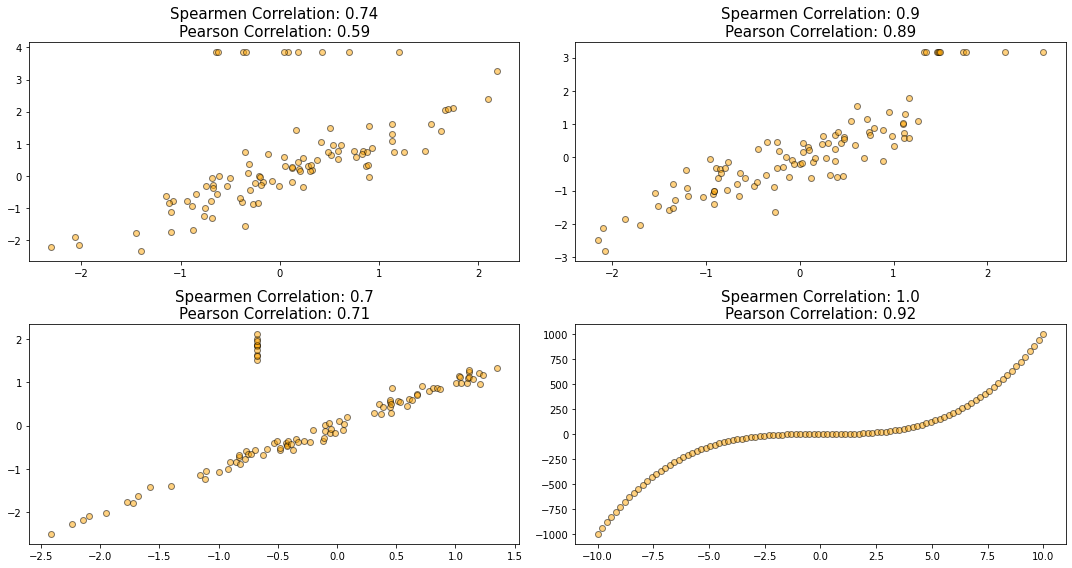

In [6]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax1.scatter(
    scatter_dataX1, scatter_dataY1, alpha=0.5, color="orange", edgecolor="k"
)
ax1.set_title(
    f"Spearmen Correlation: {round(spearmanr(scatter_dataX1,scatter_dataY1)[0],2)}\
\nPearson Correlation: {round(pearsonr(scatter_dataX1,scatter_dataY1)[0],2)}",
    size=15,
)

ax2.scatter(
    scatter_dataX2, scatter_dataY2, alpha=0.5, color="orange", edgecolor="k"
)
ax2.set_title(
    f"Spearmen Correlation: {round(spearmanr(scatter_dataX2,scatter_dataY2)[0],2)}\
\nPearson Correlation: {round(pearsonr(scatter_dataX2,scatter_dataY2)[0],2)}",
    size=15,
)

ax3.scatter(
    scatter_dataX3, scatter_dataY3, alpha=0.5, color="orange", edgecolor="k"
)
ax3.set_title(
    f"Spearmen Correlation: {round(spearmanr(scatter_dataX3,scatter_dataY3)[0],2)}\
\nPearson Correlation: {round(pearsonr(scatter_dataX3,scatter_dataY3)[0],2)}",
    size=15,
)

ax4.scatter(
    scatter_dataX4, scatter_dataY4, alpha=0.5, color="orange", edgecolor="k"
)
ax4.set_title(
    f"Spearmen Correlation: {round(spearmanr(scatter_dataX4,scatter_dataY4)[0],2)}\
\nPearson Correlation: {round(pearsonr(scatter_dataX4,scatter_dataY4)[0],2)}",
    size=15,
)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from sklearn.datasets import load_boston

# load the boston dataset of houses,
# It contains the value of houses in the area of boston in thousands along with multiple features of the houses.
# load the dataset
boston = load_boston()
# required components of the sklearn bunch object
data = boston["data"]
target = boston["target"]
cols = boston["feature_names"]

# creating a pandas dataframe
# fmt:off
pd_df = (pd.DataFrame(data, columns=cols)
         .assign(target=target))
pd_df.columns = pd_df.columns.str.lower()

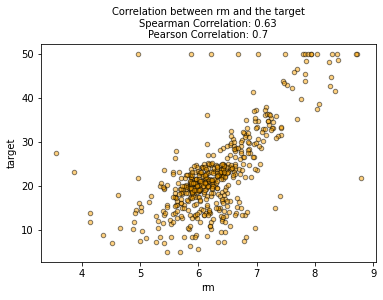

In [8]:
# fmt: on
fig, ax = plt.subplots()
subset_df = pd_df.loc[:, ["rm", "target"]]
subset_df.plot(
    kind="scatter",
    x="rm",
    y="target",
    alpha=0.5,
    color="orange",
    edgecolor="k",
    ax=ax,
)
ax.set_title(
    f"Correlation between rm and the target\nSpearman Correlation: {round(subset_df.corr(method='spearman')['target'][0],2)}\
\nPearson Correlation: {round(subset_df.corr(method='pearson')['target'][0],2)}",
    fontweight="normal",
    size=10,
)
plt.show()

<AxesSubplot:>

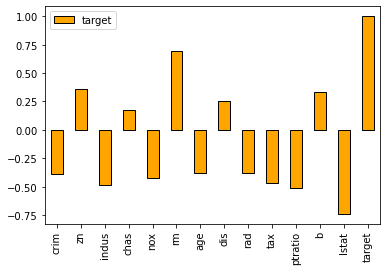

In [9]:
# correlation ranges from -1 to 1
corr = pd_df.corr()
corr[["target"]].plot(kind="bar", color="orange",edgecolor="k")